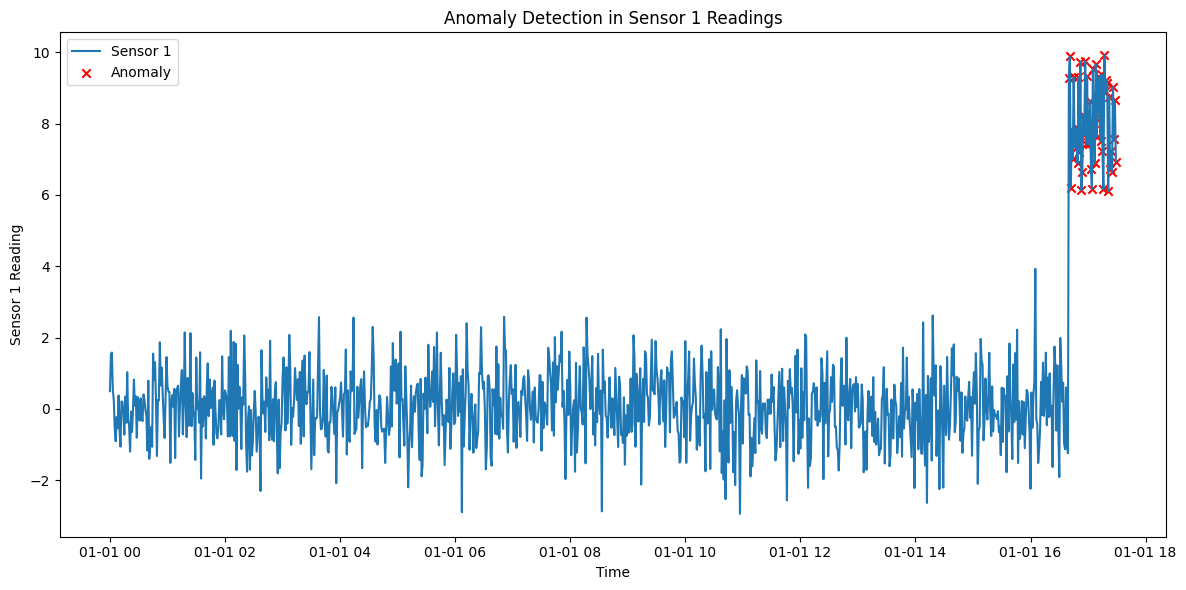

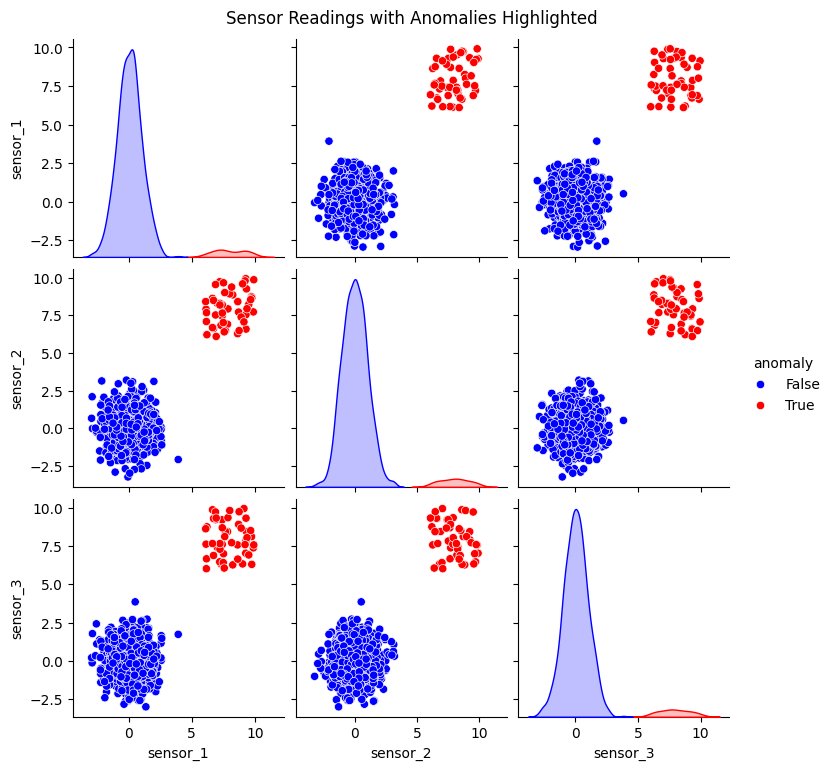

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Load or generate dataset
# Replace this with your Kaggle dataset loading code, e.g.:
df = pd.read_csv('smart_system_anomaly_dataset.csv')

# For demonstration, generate synthetic gas sensor data with anomalies
np.random.seed(42)
n_samples = 1000

# Normal data: 3 sensor readings with normal distribution
X_normal = np.random.normal(loc=0, scale=1, size=(n_samples, 3))

# Inject anomalies: 50 samples with larger values
n_anomalies = 50
X_anomalies = np.random.uniform(low=6, high=10, size=(n_anomalies, 3))

# Combine
X = np.vstack([X_normal, X_anomalies])
timestamps = pd.date_range(start='2024-01-01', periods=len(X), freq='min')

df = pd.DataFrame(X, columns=['sensor_1', 'sensor_2', 'sensor_3'])
df['timestamp'] = timestamps

# Step 2: Train Isolation Forest
model = IsolationForest(contamination=n_anomalies / len(X), random_state=42)
df['anomaly_score'] = model.fit_predict(df[['sensor_1', 'sensor_2', 'sensor_3']])

# In IsolationForest, -1 means anomaly, 1 means normal
df['anomaly'] = df['anomaly_score'] == -1

# Step 3: Visualize anomalies

# Plot sensor_1 readings over time, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['sensor_1'], label='Sensor 1')
plt.scatter(df.loc[df['anomaly'], 'timestamp'], df.loc[df['anomaly'], 'sensor_1'],
            color='red', label='Anomaly', marker='x')
plt.xlabel('Time')
plt.ylabel('Sensor 1 Reading')
plt.title('Anomaly Detection in Sensor 1 Readings')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Pairplot to visualize anomalies across sensors (requires seaborn)
import seaborn as sns
sns.pairplot(df, vars=['sensor_1', 'sensor_2', 'sensor_3'], hue='anomaly', palette={False: 'blue', True: 'red'})
plt.suptitle('Sensor Readings with Anomalies Highlighted', y=1.02)
plt.show()
